# Python Notes

---
<a id='top'></a>
## Contents:
* [Basics](#basics)
* [Random Functions](#random_functions)
--- 

## Basics  <a id='basics'></a>

<u>Cell Actions:</u>
* H: Keyboard shortcuts
* Ctrl Shift P: Command Palette
* Enter/Esc: Edit/Command mode
* M/Y: Markdown/Code
* L: Line numbers
* A/B: Insert cell above, below
* DD : Delete cell
* (Esc) S: Save
* %/%%: Line/Cell magics (e.g. time, timeit, pdb)
* ` Code, ``` Code Block
* `$`Math, $$ Math Block (a [ref](https://latex-tutorial.com/tutorials/amsmath/) for LaTex Math)
    
<u>Code Actions:</u>
* Ctrl Enter: Run 
* Shift Enter: Run and go to the next cell
* Ctrl /: Comment 
* Tab: Autocomplete
* Shift Tab: Documentation (Shift Tab x2: more details)

<u>Notebook Actions:</u>
* html: 
    ```
    from subprocess import call
    call(['python', '-m', 'nbconvert', 'My_Notebook.ipynb'])
```
---

### Sort lists

In [2]:
data = ['epsilon','beta','alpha']
data.sort()
print('default:', data)

data.sort(key=len, reverse=True)
print('key:', data)

data.sort(key=lambda x:x[1])
print('lambda as key:', data)

default: ['alpha', 'beta', 'epsilon']
key: ['epsilon', 'alpha', 'beta']
lambda as key: ['beta', 'alpha', 'epsilon']


### Sort DF [(pandas)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [135]:
import pandas as pd
import numpy as np
print(pd.__version__,'\n')

df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})

print(df.shape,'\n')
print(df.info(),'\n')
print(df.describe(),'\n')
print(df,"\n")

print(type(df.col1))
print(type(df['col1']))
print(type(df.loc[:,'col1']))
print(type(df[['col1']]),'\n')

print(df.sort_values(by=['col1'], ascending=False, na_position='first'),"\n")

print(df.sort_values(by=['col2', 'col1']),"\n")

print(df.sort_values(by='col4', key=lambda col: col.str.lower()),"\n")

1.3.4 

(6, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    5 non-null      object
 1   col2    6 non-null      int64 
 2   col3    6 non-null      int64 
 3   col4    6 non-null      object
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes
None 

           col2      col3
count  6.000000  6.000000
mean   5.166667  3.166667
std    3.311596  3.188521
min    1.000000  0.000000
25%    2.500000  1.250000
50%    5.500000  2.500000
75%    7.750000  3.750000
max    9.000000  9.000000 

  col1  col2  col3 col4
0    A     2     0    a
1    A     1     1    B
2    B     9     9    c
3  NaN     8     4    D
4    D     7     2    e
5    C     4     3    F 

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> 

  col1  col2  col3 col4
3  NaN     8     4    D
4  

### Dictionary: switch keys and values

In [1]:
def group_by_owners(files):
    owners = {}
    for owner in files.values():
        owners[owner] = []
    for file, owner in files.items():
        owners[owner].append(file)
    return owners

if __name__ == "__main__":    
    files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
    }   
    print(group_by_owners(files))

{'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']}


### DF Manipulation

In [ ]:
df.loc[df.col1==0, 'col2']='isZero'

### List comprehensions

In [115]:
[[i+j for i in range(2)] for j in range(5)]

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]

In [117]:
[i * j for i in range(2, 6) for j in range(3, 7) if i % j == 0]

[9, 16, 25]

In [108]:
{x: x + y for x in range(4, 8) for y in range(3, 7)}

{4: 10, 5: 11, 6: 12, 7: 13}

In [109]:
grades = {"Nora": 78, "Gino": 100, "Talina": 56, "Elizabeth": 45, "Lulu": 67}
approved_students = {student: grade for (student, grade) in grades.items() if grade >= 60}
approved_students

{'Nora': 78, 'Gino': 100, 'Lulu': 67}

### Arrays

In [2]:
import numpy as np 
array_1 = np.array([[1, 2, 7], [3, 4, 8]])
array_2 = np.array([[1, 2], [3, 9], [4, 16]])
np.dot(array_1, array_2)

array([[ 35, 132],
       [ 47, 170]])

### f-Strings & str.format

In [111]:
first_name = "Nora"
favorite_language = "Python"

print(f"Hi, I'm {first_name}. I'm learning {favorite_language}.")
print("Hi, I'm {}. I'm learning {}.".format(first_name, favorite_language)) 
#arguments can be indexed or key-worded as well
print("Hi, I'm {0}. I'm learning {fl}.".format(first_name, fl=favorite_language)) 

Hi, I'm Nora. I'm learning Python.
Hi, I'm Nora. I'm learning Python.
Hi, I'm Nora. I'm learning Python.


In [11]:
a_number = 1 / 3
percentage = "{:.2%}".format(a_number)
print(percentage)

33.33%


In [44]:
#from: https://stackoverflow.com/questions/44780357/how-to-use-newline-n-in-f-string-to-format-output-in-python-3-6
names = ['Adam', 'Bob', 'Cyril']
nl = '\n'
print(f"Winners are:{nl}{nl.join(names)}")

n = "\n".join(names)
print(f"Winners are:\n{n}")

print('Winners are:', *names, sep='\n')

print("{\\} {*}".format(**{"\\": 'Hello', "*": 'World!'}))

print("{}\n{}\n{}".format(names[0],names[1],names[2]))

Winners are:
Adam
Bob
Cyril
Winners are:
Adam
Bob
Cyril
Winners are:
Adam
Bob
Cyril
Hello World!
Adam
Bob
Cyril


### (string methods [doc](https://docs.python.org/3/library/stdtypes.html#string-methods))
---

### Break & Continue

In [69]:
my_list = [1, 2, 3, 4, 5]
my_list2 = [1]

#break: stop the loop
print('loop1')
for elem in my_list:
    if elem % 2 == 0:
        print("Even:", elem)
        print("break")
        break
    else:
        print("Odd:", elem)

#else can also be used for the for loop (runs if break doesn't run)
print('\nloop2')
x = 5
while x < 9:
    if x % 2 == 0:
        print("Even number found")
        break
    print(x)
    x += 2
else:
    print("All numbers were odd")
        
#continue: skip the rest of iteration
print('\nloop3')
for elem in my_list:
    if elem % 2 == 0:
        print("continue")
        continue
    print("Odd:", elem)

loop1
Odd: 1
Even: 2
break

loop2
5
7
All numbers were odd

loop3
Odd: 1
continue
Odd: 3
continue
Odd: 5


### zip & enumerate

In [56]:
my_list1 = ['a', 'b', 'c', 'd']
my_list2 = [5, 6, 7, 8]

for elem1, elem2 in zip(my_list1, my_list2):
    print(elem1, elem2)
    
print('')  
for i, elem in enumerate(my_list1):
    print(i, elem)

print("\nstart the counter from 2:")
for i, char in enumerate("word", 2):
    print(i, char)

a 5
b 6
c 7
d 8

0 a
1 b
2 c
3 d

start the counter from 2:
2 w
3 o
4 r
5 d


### Try and except

In [74]:
a = int(input("Enter a: "))
b = int(input("Enter b: "))

try:
    division = a / b
    print(division)
except ZeroDivisionError as err:   #except can be stated without specification (except:)
    print("Please enter valid values.", err)
else:
    print("Both values were valid.")
finally:  #finally always runs
    print("Finally!")

Enter a: 1
Enter b: 0
Please enter valid values. division by zero
Finally!


### Object oriented ([source](https://www.freecodecamp.org/news/python-code-examples-sample-script-coding-tutorial-for-beginners/))

In [106]:
class Dog:

    # Class attributes
    kingdom = "Animalia"
    species = "Canis lupus"
    
    # Instance attributes
    def __init__(self, name, age=1):
        self._name = name  # Public attribute
        self.age = age   # Non-Public attribute
    
    @property
    def name(self):
        print("Calling getter")
        return self._name

    @name.setter
    def name(self, new_name):
        print("Calling setter")
        self._name = new_name

    @name.deleter
    def name(self):
        print("Calling deleter")
        del self._name
        
    # Method
    def bark(self, repeat=1):
        print(f"woof-"*repeat,f"I'm {self._name}")
        
    

my_dog = Dog("Fred",4)
print(Dog.kingdom)
print(my_dog.species)
print(my_dog.age,'\n')
print(my_dog.name,'\n')
my_dog.bark(2)

Animalia
Canis lupus
4 

Calling getter
Fred 

woof-woof- I'm Fred


<a href=#top>top</a>

### Visualization

In [2]:
%pdb

Automatic pdb calling has been turned ON


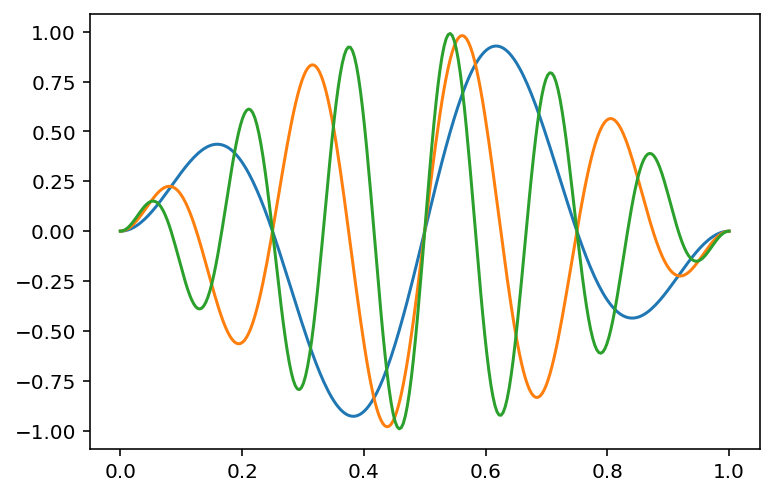

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 300)
for w in range(2, 8, 2):
    plt.plot(x, np.sin(np.pi*x)*np.sin(2*w*np.pi*x))


### ML Data Visualization [ref](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas)

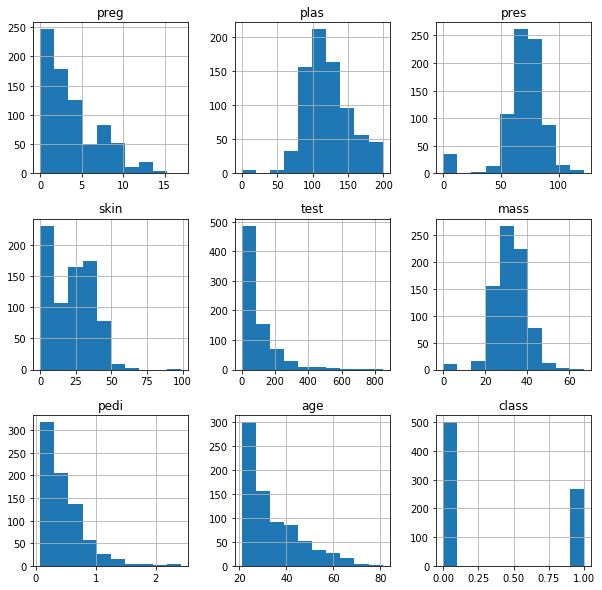

In [10]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
data.hist(figsize=(10,10))
plt.show()

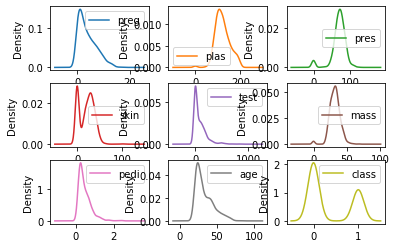

In [3]:
# Univariate Density Plots
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

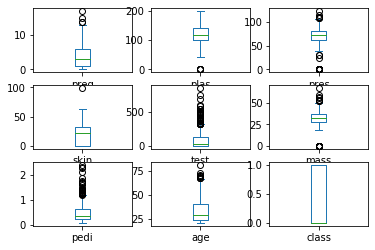

In [4]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

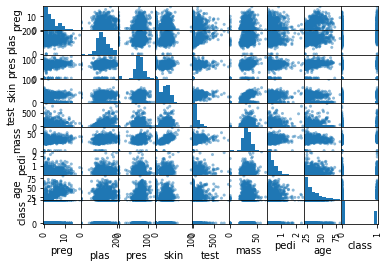

In [6]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
scatter_matrix(data)
plt.show()

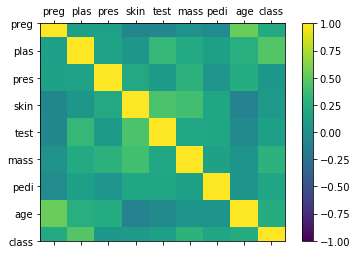

In [5]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

------------------------------------------------------------------------------------------
 ## Random Functions <a id='random_functions'></a>

### 1. Finding the lowest array index where arr[i]=i for a monotonically increasing sequence (<a href="https://www.pramp.com/challenge/jKoA5GAVy9Sr9jGBjz04">pramp</a>)

In [1]:
def indexEqualsValueSearch(arr):
    start = 0
    end = len(arr) - 1

    while (start <= end):
        i = round((start+end)/2)
        if (arr[i] - i < 0):
            start = i+1
        elif (arr[i] - i == 0) and ((i == 0) or (arr[i-1] - (i-1) < 0)):
            return i
        else:
            end = i-1

    return -1

#test
arr = [-8,0,2,5]
indexEqualsValueSearch(arr)

2

### 2. Reading multiple input files into a DF [(Dennis)](https://medium.com/@dennisyd/how-i-made-6-000-in-10-minutes-using-data-science-8351701de1af?utm_source=pocket_mylist)

In [3]:
#skip running without files

import os, pandas as pd

industries = ["Finance", "Technology"]

list_of_files = dict ([ (file, os.sep.join((dir, file)))
                        for (dir, dirs, files) in os.walk(path)
                        for file in files 
                        if file[-4:] == '.csv' ])

frames = []

for key in list_of_files:
    df = pd.read_csv(list_of_files.get(key), low_memory = False)
    frames.append(df[df['Industry'].str.contains('|'.join(industries), na = False)].copy())
    
df = pd.concat(frames)
df.head()


### 3. Finding the index at which a list of words starts alphabetically ([IC](https://www.interviewcake.com/question/python/find-rotation-point))

In [22]:
words = [
    'ptolemaic',
    'retrograde',
    'supplant',
    'undulate',
    'xenoepist',
    'asymptote',  # <-- rotates here!
    'babka',
    'banoffee',
    'engender',
    'karpatka',
    'othellolagkage',
]

firstL = [word[0] for word in words]

print(firstL)

for i in range(len(firstL)-1):
    if firstL[i+1]<firstL[i]:
        print ('the starting index is:', i+1)


['p', 'r', 's', 'u', 'x', 'a', 'b', 'b', 'e', 'k', 'o']
the starting index is: 5


In [26]:
firstL.index('a') 

5

### 4. Ratio of positives, negatives and zeros in an integer array

In [10]:
#from HackerRank
import math
import os
import random
import re
import sys

#
# Complete the 'plusMinus' function below.
#
# The function accepts INTEGER_ARRAY arr as parameter.
#

def plusMinus(arr):
    zeros = 0
    pos = 0
    neg = 0
    for j in arr:
        if j==0: 
            zeros += 1
        elif j>0:
            pos += 1
        else: 
            neg += 1
    print("{:.6f}".format(pos/(pos+zeros+neg)))
    print("{:.6f}".format(neg/(pos+zeros+neg)))
    print("{:.6f}".format(zeros/(pos+zeros+neg)))
if __name__ == '__main__':
    #n = int(input().strip())

    arr = list(map(int, input().rstrip().split()))

    plusMinus(arr)

# Input (stdin)
# •	6
# •	-4 3 -9 0 4 1
# Your Output (stdout) 
# •	0.500000
# •	0.333333
# •	0.166667


4 5 -9 8 -1 0 56 -8 -7 -9
0.400000
0.500000
0.100000


[top](#top)